# ___

# [ Machine Learning in Geosciences ]

**Department of Applied Geoinformatics and Carthography, Charles University** 

*Lukas Brodsky lukas.brodsky@natur.cuni.cz*



## Classifer model generalization exercises

Tasks: 

1. Test if the problem (given the dataset) is linearly separabile, compare Logistic Regresion and Decision Trees.  

2. Evaluate when the Decision Tree starts overfitting with regard to the tree depth.  

3. Tune DT hyperparameters using cross-validation with grid search technique. Report the best hyperparameters and achieved accuracy. 

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification # dataset generator
from sklearn.model_selection import train_test_split # to separete the dataset in training and testing
from sklearn.tree import DecisionTreeClassifier # Decision Tree classifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

### Sample data

In [8]:
X, y = make_classification(n_samples=10000, n_features=20,
                           n_informative=5, n_redundant=15, random_state=1)

In [9]:
# Classes
np.unique(y)

array([0, 1])

In [11]:
# Split train and test (50%) data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

### 1. Is the problem linearly separable? 
Test logistic regression model. 

In [ ]:
# instantiate Logistic regression model
pass

In [ ]:
# fit model
pass

In [ ]:
# train accuracy
pass

In [ ]:
# test accuracy
pass

In [ ]:
# Evalaute the model

### Compare it with Decision Tree Classifier

In [30]:
# DT model
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_train, y_train)
y_train_pred = dt.predict(X_train)
acc_train = accuracy_score(y_train, y_train_pred)
print(f'Train accuracy: {acc_train:.2f}')


Train accuracy: 0.97


In [31]:
y_test_pred = dt.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test accuracy: {test_accuracy:.2f}')


Test accuracy: 0.92


### 2. When the DT() model starts overfitting with regard to the depth of the tree? 

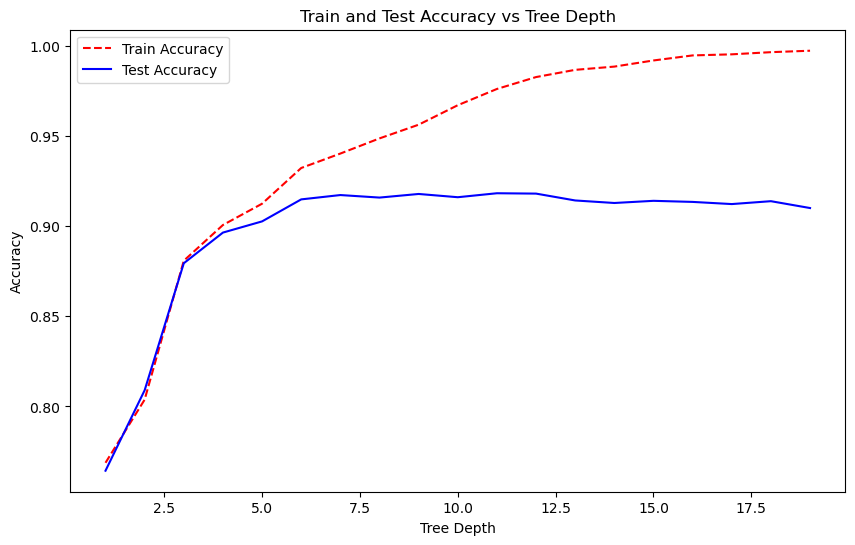

In [36]:
depths = np.arange(1, 20)
plt.figure(figsize=(10, 6))

train_accuracies = []
test_accuracies = []
for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_pred)
    train_accuracies.append(train_accuracy)
    
    y_pred = dt.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    test_accuracies.append(test_accuracy)
plt.plot(depths, train_accuracies, label='Train Accuracy', color='red', linestyle='--')
plt.plot(depths, test_accuracies, label='Test Accuracy', color='blue')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs Tree Depth')
plt.legend()
plt.show()

    

# When the model starts overfitting?
The model started to overfit around a depth of 5, but I would suggest using a depth of 6 because the test accuracy still increases and the difference between train and test is less than 5%.

### 3. Finetune the DT model through cross-validation and grid search, report accuracy. 
Another possible solution is to use external lib AutoML
see: https://www.automl.org/automl/

In [37]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# instantiate the model
model = DecisionTreeClassifier(random_state=42)

In [46]:
# Apply grid search of hyperparameters and cross-validation 
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
hyperparameter_space = {'max_depth': [2,4,6,8,10,15,20,50,100],
                        'min_samples_leaf': [1,2,4,6,8,10,20,30]}

gs = GridSearchCV(model, param_grid=hyperparameter_space, n_jobs=16,
                  scoring="accuracy", cv=5, return_train_score=True)

# run fit (be aware: takes longer!)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=16,
             param_grid={'max_depth': [2, 4, 6, 8, 10, 15, 20, 50, 100],
                         'min_samples_leaf': [1, 2, 4, 6, 8, 10, 20, 30]},
             return_train_score=True, scoring='accuracy')

In [41]:
# Optimal parameters and scores 
print("Optimal hyperparameter combination: ", gs.best_params_)
print("Mean cross-validated accuracy of the best_estimator: ", round(gs.best_score_ * 100, 2))

Optimal hyperparameter combination:  {'max_depth': 10, 'min_samples_leaf': 4}
Mean cross-validated accuracy of the best_estimator:  91.6


In [50]:
# Test accuracy
y_test_pred = gs.best_estimator_.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred)
print(f'Test accuracy: {acc_test:.2f}')


Test accuracy: 0.92


array([[2285,  211],
       [ 188, 2316]], dtype=int64)